In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2024-03-04 11:23:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  31.4MB/s    in 52s     

2024-03-04 11:24:28 (29.8 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-04 11:24:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-04 11:24:31 (56.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves,walk_through_dir,unzip_data,compare_historys

In [ ]:
unzip_data("/content/101_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/peking_duck'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/shrimp_and_grits'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/escargots'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/crab_cakes'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_quesadilla'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/sashimi'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/poutine'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/risotto'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/fish_and_chips'.
There are 0 directories and 75 images in

In [ ]:
train_dir='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'


In [ ]:
import pathlib
import numpy as np
dir=pathlib.Path(train_dir)
class_names=np.array(sorted([i.name for i in dir.glob("*")]))

In [ ]:
class_names

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
       'cheese_plate', 'cheesecake', 'chicken_curry',
       'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
       'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
       'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
       'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
       'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
       'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
       'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
       'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
       'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
       'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus',
       

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os
def random_image(dir):
  random_class=random.choice(class_names)
  path=dir+'/'+random_class
  random_img=random.choice(os.listdir(path))
  print(path+"/"+random_img)
  img=mimg.imread(path+"/"+random_img)
  plt.imshow(img)
  plt.axis(False)
  plt.title(random_class)
  return img

101_food_classes_10_percent/train/tacos/499937.jpg


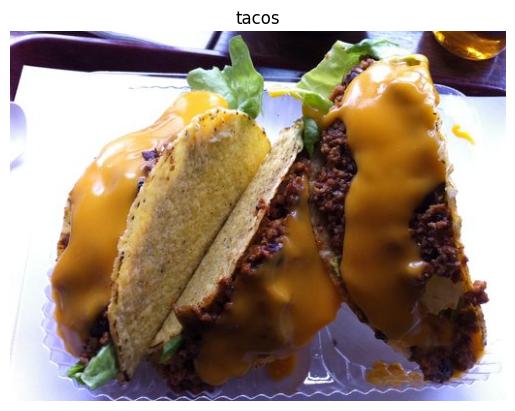

In [ ]:
img=random_image(train_dir)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
train_ds=image_dataset_from_directory(train_dir,
                                      label_mode='categorical',
                                      image_size=(224,224),
                                      batch_size=32
                                      )
test_ds=image_dataset_from_directory(test_dir,
                                     label_mode='categorical',
                                     image_size=(224,224),
                                     batch_size=32,
                                     shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
import tensorflow as tf
checkpoint_path="Model_Transfer_Learning/Model_Checkpoint"
checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                             save_best_only=True,
                                             save_weights_only=True,
                                             save_freq="epoch",
                                             monitor='val_accuracy'
                                             )


In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomHeight(0.3),
    tf.keras.layers.RandomWidth(0.3),
    tf.keras.layers.RandomZoom(0.4),
    tf.keras.layers.Normalization()

])

In [ ]:
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
Input=tf.keras.Input(shape=(224,224,3))
x=base_model(Input)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
Output=tf.keras.layers.Dense(len(class_names),activation='softmax')(x)
model_1=tf.keras.Model(Input,Output)
model_1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model_1.fit(train_ds,
            epochs=5,
            steps_per_epoch=len(train_ds),
            validation_data=test_ds,
            validation_steps=len(test_ds),
            callbacks=[tf.keras.callbacks.TensorBoard("TransferLearning/10_percent_data"),checkpoint])

24274472/24274472 [==============================] - 0s 0us/step
Epoch 1/5
237/237 [==============================] - 76s 273ms/step - loss: 3.2073 - accuracy: 0.3134 - val_loss: 2.2070 - val_accuracy: 0.5139
Epoch 2/5
237/237 [==============================] - 65s 275ms/step - loss: 1.9467 - accuracy: 0.5654 - val_loss: 1.7705 - val_accuracy: 0.5761
Epoch 3/5
237/237 [==============================] - 61s 256ms/step - loss: 1.5518 - accuracy: 0.6420 - val_loss: 1.6035 - val_accuracy: 0.6003
Epoch 4/5
237/237 [==============================] - 97s 410ms/step - loss: 1.3245 - accuracy: 0.6873 - val_loss: 1.5130 - val_accuracy: 0.6133
Epoch 5/5
237/237 [==============================] - 105s 443ms/step - loss: 1.1628 - accuracy: 0.7306 - val_loss: 1.4646 - val_accuracy: 0.6209


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False
Input=tf.keras.layers.Input(shape=(224,224,3))
Input=data_augmentation(Input)
x=base_model(Input)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
Output=tf.keras.layers.Dense(len(class_names),activation='softmax')(x)
model_2=tf.keras.Model(Input,Output)
model_2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history_2=model_2.fit(train_ds,
            epochs=5,
            steps_per_epoch=len(train_ds),
            validation_data=test_ds,
            validation_steps=int(0.15*len(test_ds)),
            callbacks=[tf.keras.callbacks.TensorBoard("TransferLearning/10_percent_data"),checkpoint])

Epoch 1/5
237/237 [==============================] - 57s 166ms/step - loss: 3.2156 - accuracy: 0.3057 - val_loss: 2.4938 - val_accuracy: 0.4611
Epoch 2/5
237/237 [==============================] - 45s 185ms/step - loss: 1.9542 - accuracy: 0.5593 - val_loss: 2.0329 - val_accuracy: 0.5228
Epoch 3/5
237/237 [==============================] - 27s 111ms/step - loss: 1.5593 - accuracy: 0.6416 - val_loss: 1.8102 - val_accuracy: 0.5614
Epoch 4/5
237/237 [==============================] - 26s 109ms/step - loss: 1.3237 - accuracy: 0.6925 - val_loss: 1.7516 - val_accuracy: 0.5556
Epoch 5/5
237/237 [==============================] - 23s 94ms/step - loss: 1.1595 - accuracy: 0.7281 - val_loss: 1.6749 - val_accuracy: 0.5644


In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
Total params: 6048693 (23.07 MB)
Trainable params: 129381 (505.39 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
model_2.evaluate(test_ds)

790/790 [==============================] - 52s 65ms/step - loss: 1.4570 - accuracy: 0.6234


[1.4570425748825073, 0.6233663558959961]

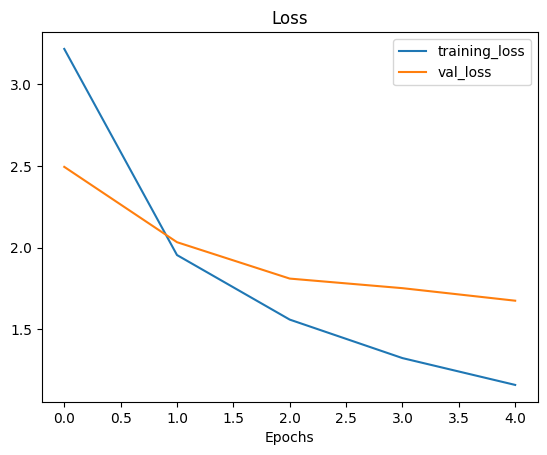

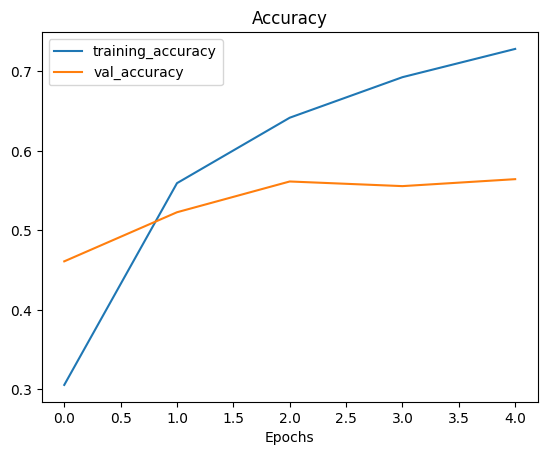

In [ ]:
plot_loss_curves(history_2)

In [ ]:
for i,layer in enumerate( model_2.layers[1].layers):
  print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_1 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
base_model=model_2.layers[1]
base_model.trainable=True
for i in base_model.layers[:-15]:
  i.trainable=False

In [ ]:
for i,layer in enumerate(base_model.layers):
  print(i,layer.name,layer.trainable)

0 input_3 False
1 rescaling_1 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])
Final_epoch=history_2.epoch[-1]+5
model_2.fit(train_ds,
            epochs=Final_epoch,
            validation_data=test_ds,
            initial_epoch=history_2.epoch[-1],
            validation_steps=len(test_ds),
            callbacks=[tf.keras.callbacks.TensorBoard('Transfer_Learning/FineTuning_15layers_unfreezes'),checkpoint])

Epoch 5/9
237/237 [==============================] - 110s 424ms/step - loss: 1.1921 - accuracy: 0.7512 - val_loss: 1.4722 - val_accuracy: 0.6305
Epoch 6/9
237/237 [==============================] - 100s 420ms/step - loss: 1.0346 - accuracy: 0.7770 - val_loss: 1.3981 - val_accuracy: 0.6408
Epoch 7/9
237/237 [==============================] - 79s 333ms/step - loss: 0.9469 - accuracy: 0.7997 - val_loss: 1.3647 - val_accuracy: 0.6469
Epoch 8/9
237/237 [==============================] - 65s 275ms/step - loss: 0.8834 - accuracy: 0.8145 - val_loss: 1.3303 - val_accuracy: 0.6510
Epoch 9/9
237/237 [==============================] - 64s 269ms/step - loss: 0.8165 - accuracy: 0.8269 - val_loss: 1.3043 - val_accuracy: 0.6550


In [ ]:
base_model.trainable=True
for i in base_model.layers[:-5]:
  i.trainable=False

In [ ]:
#model_2.load_weights(checkpoint_path)
#The above statement isnt working thus Continuing with the current weights
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.00025),
                metrics=['accuracy'])
history_fine_tuned_last5=model_2.fit(train_ds,
                                     epochs=history_2.epoch[-1]+5,
                                     validation_data=test_ds,
                                     validation_steps=int(0.15*len(test_ds)),
                                     initial_epoch=history_2.epoch[-1])

Epoch 5/9
237/237 [==============================] - 33s 104ms/step - loss: 0.0642 - accuracy: 0.8475 - val_loss: 0.0348 - val_accuracy: 0.6012
Epoch 6/9
237/237 [==============================] - 22s 91ms/step - loss: 0.0225 - accuracy: 0.8455 - val_loss: 0.0307 - val_accuracy: 0.6088
Epoch 7/9
237/237 [==============================] - 24s 99ms/step - loss: 0.0198 - accuracy: 0.8465 - val_loss: 0.0292 - val_accuracy: 0.6102
Epoch 8/9
237/237 [==============================] - 23s 96ms/step - loss: 0.0182 - accuracy: 0.8545 - val_loss: 0.0282 - val_accuracy: 0.6168
Epoch 9/9
237/237 [==============================] - 26s 108ms/step - loss: 0.0171 - accuracy: 0.8636 - val_loss: 0.0270 - val_accuracy: 0.6224


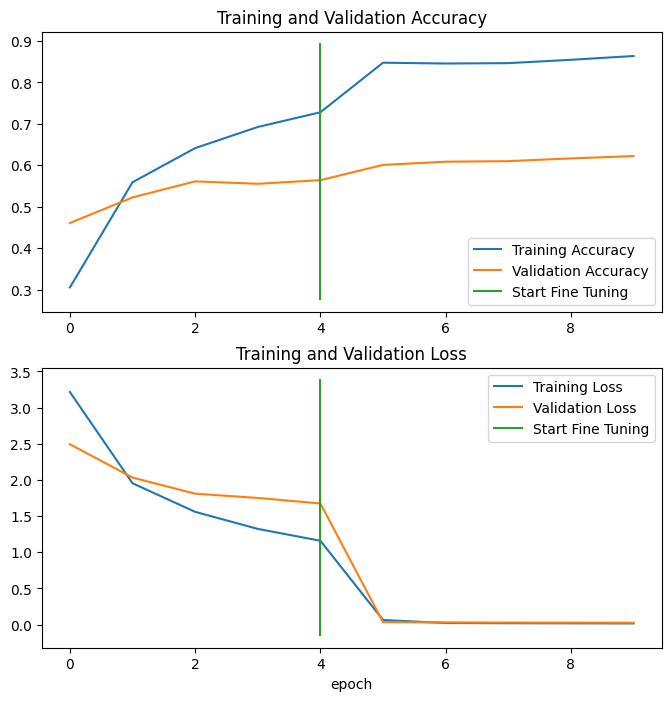

In [ ]:
compare_historys(history_2,history_fine_tuned_last5)

In [ ]:
model_2.evaluate(test_ds)

790/790 [==============================] - 51s 64ms/step - loss: 0.0237 - accuracy: 0.6661


[0.023726798593997955, 0.6660990118980408]

In [ ]:
model_2.save("/content/drive/MyDrive/Tensorflow/101_food_classes10_percent")

In [ ]:
loaded_model=tf.keras.saving.load_model("/content/drive/MyDrive/Tensorflow/101_food_classes10_percent")

In [ ]:
loaded_model.evaluate(test_ds)

790/790 [==============================] - 55s 67ms/step - loss: 0.0237 - accuracy: 0.6661


[0.023726798593997955, 0.6660990118980408]

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2024-03-04 11:25:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  24.7MB/s    in 1.8s    

2024-03-04 11:25:36 (24.7 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
import tensorflow as tf

pretrained_model=tf.keras.saving.load_model("/content/06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
pretrained_model.evaluate(test_ds)

In [ ]:
preds_probs=pretrained_model.predict(test_ds,verbose=1)

In [ ]:
len(preds_probs)

In [ ]:
prediction=preds_probs.argmax(axis=1)
prediction[:10]

In [ ]:
y_labels=[]
for images,labels in test_ds.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
y_labels[:10]

Actual:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Predicted:[52,  0,  0, 80, 79, 61, 29,  0, 85,  0]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_labels,prediction)

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
class_names

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_labels,
                                        y_pred=prediction,
                                        display_labels=class_names,
                                        cmap="Blues",
                                        xticks_rotation="vertical",
                                        # make it bigger
                                        ax=plt.figure(figsize=(70, 70), dpi=150).subplots())


In [ ]:
y_labels[:10]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,y_pred=prediction))

In [ ]:
classification_report_dict=classification_report(y_true=y_labels,
                                                 y_pred=prediction,
                                                 output_dict=True)

In [ ]:
classification_report_dict['1']

In [ ]:
classes_f1_scores={}
for k,v in classification_report_dict.items():
  if k=='accuracy':
    break
  else:
    classes_f1_scores[class_names[int(k)]]=v['f1-score']

In [ ]:

classes_f1_scores

In [ ]:
import pandas as pd
f1_scores=pd.DataFrame({'classes':list(classes_f1_scores.keys()), 'F1-Score':list(classes_f1_scores.values())}).sort_values("F1-Score",ascending=False)

In [ ]:
f1_scores

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,25))
scores=ax.barh(range(len(class_names)), f1_scores['F1-Score'].values)
ax.set_yticks(range(len(class_names)))
ax.set_yticklabels(f1_scores['classes'])
ax.set_xlabel('F1-Score')
ax.set_title("F1-Scores for 101 different Food Classes")
ax.invert_yaxis()

In [ ]:
def load_and_prep_images(filename,image_shape=224,scale=True):
  img=tf.io.read_file(filename)
  img=tf.io.decode_image(img,channels=3)
  img=tf.image.resize(img,[image_shape,image_shape])
  if scale:
    img=img/255.
  return img


1/1 [==============================] - 0s 103ms/step


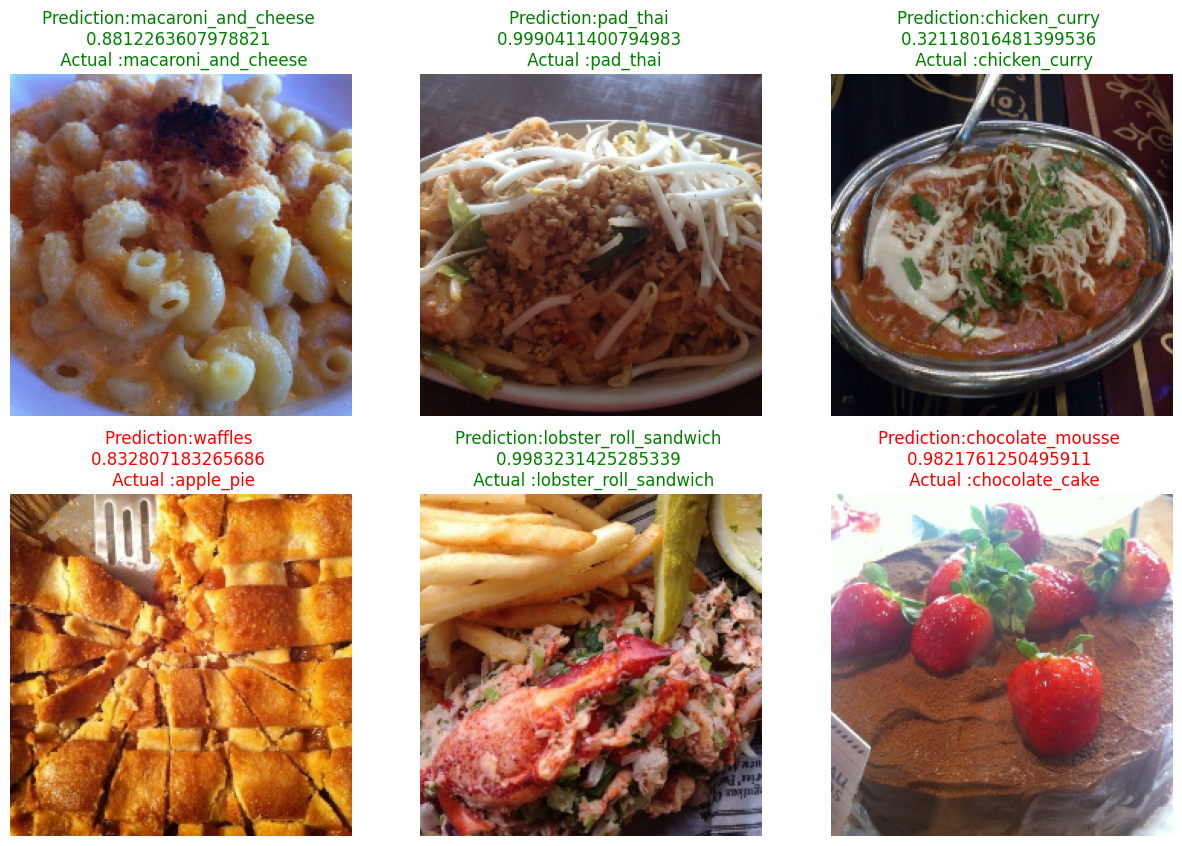

In [ ]:
import os
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in range(6):

  random_class=random.choice(class_names)
  random_img=random.choice(os.listdir(test_dir+"/"+random_class))
  path=test_dir+'/'+random_class+'/'+random_img
  img=load_and_prep_images(path,
                          224,scale=False)

  a=pretrained_model.predict(tf.expand_dims(img,axis=0))
  k=a.argmax()
  l=a.max()
  plt.subplot(2,3,i+1)
  plt.imshow(img/255.)
  prediction=class_names[k]
  if(random_class==prediction):
    color='g'
  else:
    color='r'
  plt.title(f"Prediction:{prediction} \n{l} \n Actual :{random_class}",c=color)
  plt.axis(False)

In [ ]:
class_names

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
       'cheese_plate', 'cheesecake', 'chicken_curry',
       'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
       'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
       'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
       'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
       'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
       'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
       'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
       'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
       'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
       'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus',
       

In [ ]:
filepaths=[]
for filepath in test_ds.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                                  shuffle=False):
  filepaths.append(filepath.numpy())


In [ ]:
filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

1